<a href="https://colab.research.google.com/github/loguansiang/fyp/blob/main/lstm80_20_FINAL_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [339]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras import optimizers
import matplotlib.pyplot as plt
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense, Dropout
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, LSTM
from keras import optimizers
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [340]:
url = 'https://raw.githubusercontent.com/loguansiang/fyp/main/SAND%20fyp.csv'
hist= pd.read_csv(url)
hist = hist.set_index('Date')
hist.index = pd.to_datetime(hist.index)
target_col = 'Close'

In [341]:
hist = hist['Close']

In [342]:
def train_test_split(df, test_size=0.2):
    split_row = len(df) - int(test_size * len(df))
    train_data = df.iloc[:split_row]
    test_data = df.iloc[split_row:]
    return train_data, test_data

In [343]:
train, test = train_test_split(hist, test_size=0.2)

In [344]:
def line_plot(line1, line2, label1=None, label2=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(13, 7))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.set_ylabel('Price [USD]', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend(loc='best', fontsize=16);

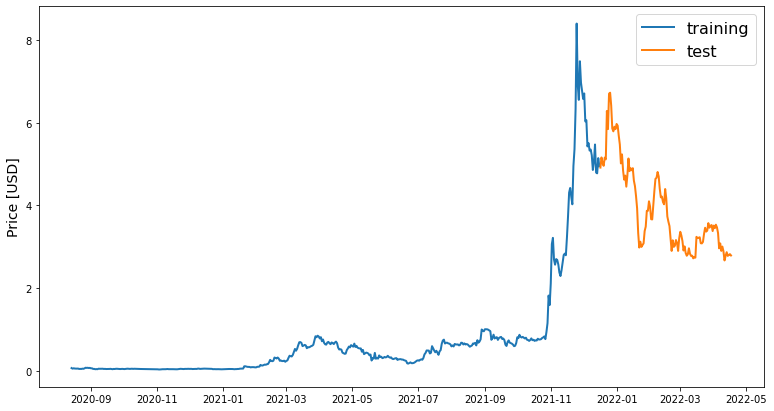

In [345]:
line_plot(train, test, 'training', 'test', title='')

In [346]:
train =train.values.reshape(train.shape[0],1)
test =test.values.reshape(test.shape[0],1)
scaler = MinMaxScaler(feature_range=(0, 1))
train = scaler.fit_transform(train)
test = scaler.fit_transform(test)

In [347]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

#random seed
numpy.random.seed(7)

In [348]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)



In [349]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))




In [350]:
testY.shape

(120,)

In [351]:

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(100, input_shape=(look_back,1 )))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('linear'))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX,trainY, epochs=20, batch_size=32, verbose=2)
model.summary()



Epoch 1/20
16/16 - 2s - loss: 0.0301 - 2s/epoch - 127ms/step
Epoch 2/20
16/16 - 0s - loss: 0.0226 - 52ms/epoch - 3ms/step
Epoch 3/20
16/16 - 0s - loss: 0.0203 - 50ms/epoch - 3ms/step
Epoch 4/20
16/16 - 0s - loss: 0.0172 - 46ms/epoch - 3ms/step
Epoch 5/20
16/16 - 0s - loss: 0.0148 - 59ms/epoch - 4ms/step
Epoch 6/20
16/16 - 0s - loss: 0.0118 - 53ms/epoch - 3ms/step
Epoch 7/20
16/16 - 0s - loss: 0.0090 - 52ms/epoch - 3ms/step
Epoch 8/20
16/16 - 0s - loss: 0.0070 - 53ms/epoch - 3ms/step
Epoch 9/20
16/16 - 0s - loss: 0.0043 - 56ms/epoch - 4ms/step
Epoch 10/20
16/16 - 0s - loss: 0.0030 - 54ms/epoch - 3ms/step
Epoch 11/20
16/16 - 0s - loss: 0.0021 - 56ms/epoch - 3ms/step
Epoch 12/20
16/16 - 0s - loss: 0.0012 - 48ms/epoch - 3ms/step
Epoch 13/20
16/16 - 0s - loss: 7.5160e-04 - 52ms/epoch - 3ms/step
Epoch 14/20
16/16 - 0s - loss: 6.4183e-04 - 49ms/epoch - 3ms/step
Epoch 15/20
16/16 - 0s - loss: 4.9608e-04 - 51ms/epoch - 3ms/step
Epoch 16/20
16/16 - 0s - loss: 5.6409e-04 - 51ms/epoch - 3ms/step
E

In [352]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = mean_squared_error(trainY[0], trainPredict[:,0])
print('Train Score: %.2f MSE' % (trainScore))
testScore = mean_squared_error(testY[0], testPredict[:,0])
print('Test Score: %.2f MSE' % (testScore))

Train Score: 0.01 MSE
Test Score: 0.06 MSE


In [353]:
testX = numpy.reshape(testX, (testY.shape[1], 1))
testY = numpy.reshape(testY, (testY.shape[1], 1))

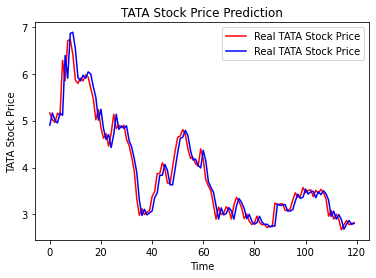

In [355]:
plt.plot(testY, color = 'red', label = 'Real TATA Stock Price')
plt.plot(testPredict, color = 'blue', label = 'Real TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()